# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [917]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [918]:
df_descr = pd.read_csv('data\otp_description.csv', sep='\t', encoding='utf8')

In [919]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [920]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [921]:
df_train.shape

(15223, 52)

In [922]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [923]:
df_test.shape

(14910, 52)

In [924]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [925]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [926]:
df = df_test.append(df_train).reset_index(drop=True)

In [927]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [928]:
categoria_columns=[] 
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        categoria_columns.append(i) #запомним сразу те колонки, у которых тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(len(set(df[i]))) # выводим количество категорий
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку
print('\n\n',categoria_columns) # выводим названия всех колонок, у которых тип столбца - object

EDUCATION
7
{'Два и более высших образования', 'Среднее специальное', 'Неполное среднее', 'Неоконченное высшее', 'Высшее', 'Среднее', 'Ученая степень'}


MARITAL_STATUS
5
{'Состою в браке', 'Гражданский брак', 'Вдовец/Вдова', 'Не состоял в браке', 'Разведен(а)'}


GEN_INDUSTRY
32
{nan, 'Сборочные производства', 'Транспорт', 'Металлургия/Промышленность/Машиностроение', 'Коммунальное хоз-во/Дорожные службы', 'Сельское хозяйство', 'Информационные технологии', 'Юридические услуги/нотариальные услуги', 'Подбор персонала', 'ЧОП/Детективная д-ть', 'Строительство', 'Наука', 'Страхование', 'Управляющая компания', 'Государственная служба', 'Развлечения/Искусство', 'Образование', 'Банк/Финансы', 'Салоны красоты и здоровья', 'Логистика', 'Здравоохранение', 'Торговля', 'Энергетика', 'Другие сферы', 'Нефтегазовая промышленность', 'СМИ/Реклама/PR-агенства', 'Ресторанный бизнес/Общественное питание', 'Туризм', 'Недвижимость', 'Информационные услуги', 'Химия/Парфюмерия/Фармацевтика', 'Маркетинг'}


GEN

Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [929]:
err_col={'PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT'}
for i in df.columns:
    if (i in err_col and str(df[i].dtype)=='object'):
        df[i]=df[i].map(lambda x: x.replace(',', '.')).astype('float')
        categoria_columns.remove(i) #удаляем колонку из списка колонок, у которых тип столбца - object

In [930]:
# df.info()

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

##### Выберем колонки с нулевыми значениями и посмотрим на их характеристики

In [931]:
df_train=df[df['sample']=='train'].drop('sample', axis=1)

In [932]:
df_train_len=df_train.shape[0]
null_columns=[]
print('Столбцы с нулевыми значениями:')
for i,j in enumerate(df_train.columns):
    if any(pd.isnull(df_train.iloc[:,i])):
        null_columns.append(j)
        print('{} {} ({}) имеет {:.2%} пропусков и {} уникальных значения'.format(i, j, type(df_train.iloc[0,i]), (pd.isnull(df_train[j]).sum()/df_train_len), len(set(df_train[j]))-1))
print(null_columns)

Столбцы с нулевыми значениями:
10 GEN_INDUSTRY (<class 'str'>) имеет 8.98% пропусков и 31 уникальных значения
11 GEN_TITLE (<class 'str'>) имеет 8.98% пропусков и 12 уникальных значения
12 ORG_TP_STATE (<class 'str'>) имеет 8.98% пропусков и 5 уникальных значения
13 ORG_TP_FCAPITAL (<class 'str'>) имеет 8.97% пропусков и 2 уникальных значения
14 JOB_DIR (<class 'str'>) имеет 8.98% пропусков и 10 уникальных значения
20 TP_PROVINCE (<class 'str'>) имеет 1.94% пропусков и 70 уникальных значения
21 REGION_NM (<class 'str'>) имеет 0.01% пропусков и 11 уникальных значения
40 WORK_TIME (<class 'numpy.float64'>) имеет 8.99% пропусков и 1669 уникальных значения
51 PREVIOUS_CARD_NUM_UTILIZED (<class 'numpy.float64'>) имеет 98.11% пропусков и 14936 уникальных значения
['GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'TP_PROVINCE', 'REGION_NM', 'WORK_TIME', 'PREVIOUS_CARD_NUM_UTILIZED']


##### Рассмотрим внимательнее колонку WORK_TIME

In [933]:
print('Характеристики столбца WORK_TIME')
df_train['WORK_TIME'].describe()

Характеристики столбца WORK_TIME


count    1.385500e+04
mean     2.922120e+02
std      2.436483e+04
min      1.000000e+00
25%      2.400000e+01
50%      4.800000e+01
75%      1.100000e+02
max      2.867959e+06
Name: WORK_TIME, dtype: float64

15 значений свыше 50 лет, максимальное 238996.583333 лет


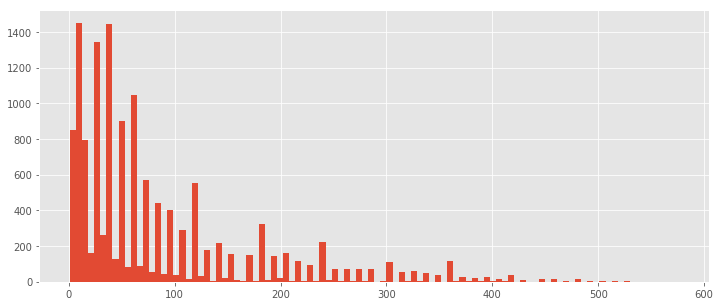

In [934]:
# Посмотрим распределение WORK_TIME
from matplotlib import pyplot as plt
work_time_porog=50 # уберём с гистограммы выбросы выше 50 лет, которые скорее всего являются ошибкой
df_train.WORK_TIME[df_train.WORK_TIME<12*work_time_porog].hist(bins=100)
print('{} значений свыше {} лет, максимальное {:f} лет'.format(df_train.WORK_TIME[df_train.WORK_TIME>12*work_time_porog].count(), work_time_porog, df_train.WORK_TIME.max()/12))

##### Сравним между собой колонки, содержащие регион (адрес)

In [935]:
ADDRESS_COL={'TP_PROVINCE','FACT_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE','REG_ADDRESS_PROVINCE'}
for ii, i in enumerate(ADDRESS_COL) :
    for jj, j in enumerate(ADDRESS_COL) :
        if jj > ii :
            different_region=df_train[~df_train[i].isnull()][~df_train[j].isnull()][(df_train[i]!=df_train[j])][i].count()
            same_region=df_train[~df_train[i].isnull()][~df_train[j].isnull()][(df_train[i]==df_train[j])][i].count()
            print('\n','Совпадения {} и {}'.format(i,j))
            print('Не совпало {} значений, совпало {} ({:.2%}) значений'.format(different_region, same_region, same_region/(same_region+different_region)))


 Совпадения REG_ADDRESS_PROVINCE и POSTAL_ADDRESS_PROVINCE
Не совпало 149 значений, совпало 15074 (99.02%) значений

 Совпадения REG_ADDRESS_PROVINCE и FACT_ADDRESS_PROVINCE
Не совпало 191 значений, совпало 15032 (98.75%) значений

 Совпадения REG_ADDRESS_PROVINCE и TP_PROVINCE
Не совпало 1124 значений, совпало 13804 (92.47%) значений

 Совпадения POSTAL_ADDRESS_PROVINCE и FACT_ADDRESS_PROVINCE
Не совпало 44 значений, совпало 15179 (99.71%) значений

 Совпадения POSTAL_ADDRESS_PROVINCE и TP_PROVINCE
Не совпало 1059 значений, совпало 13869 (92.91%) значений

 Совпадения FACT_ADDRESS_PROVINCE и TP_PROVINCE
Не совпало 1052 значений, совпало 13876 (92.95%) значений


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [936]:
# Подскажите, пожалуйста, что значит это красное предупреждение?

Колонка 51 PREVIOUS_CARD_NUM_UTILIZED имеет слишком много пропусков. От неё лучше избавиться.

In [937]:
i='PREVIOUS_CARD_NUM_UTILIZED'
if i in df_train.columns: df_train=df_train.drop(i, axis=1)
if i in null_columns: null_columns.remove(i)
if i in categoria_columns: categoria_columns.remove(i)

Колонка 20 TP_PROVINCE достаточно плотно заполнена, но имеет много значений, которые придётся перекодировать в категории. Более того, она во многом повторяет другие столбцы адреса. Возможно, что для первичного анализа её не стоит оставлять. Решение нужно принимать, в зависимости от того, можем ли мы себе позволить использовать так много параметров на входе модели.
Если же её заполнять, то наверное для заполнения лучше воспользоваться данными колонки FACT_ADDRESS_PROVINCE, так как 92% данных других строк совпадает. Возможно поэкспериментировать, какую колонку оставлять - посмотреть, какая из колонок даёт лучший результат предсказания. Мы для простоты оставим FACT_ADDRESS_PROVINCE. Все остальные будут характеризоваться имеющимися в таблице столбцами, определяющими совпадение адресов. Итого... drop!

In [938]:
i='TP_PROVINCE'
if i in df_train.columns: df_train=df_train.drop(i, axis=1)
if i in null_columns: null_columns.remove(i)
if i in categoria_columns: categoria_columns.remove(i)

Колонка 40 WORK_TIME. Из гистограммы и основных характеристик видно, что плотность резко убывает при удалении от нуля. Для определения заполнения, можно разделить данные, например, по логарифмической шкале. И пропущенные значения приравнять к моде группы с самой большой плотностью. Но для простоты можно просто приравнять среднему значению.

In [939]:
WORK_TIME_mean=df_train.WORK_TIME.mean()
print(WORK_TIME_mean)
print('Нулевых значений было {}'.format(len(df_train.WORK_TIME[df_train.WORK_TIME.isnull()])))
df_train.WORK_TIME[df_train.WORK_TIME.isnull()]=WORK_TIME_mean
print('Нулевых значений стало {}'.format(len(df_train.WORK_TIME[df_train.WORK_TIME.isnull()])))

# удалим из списка колонок с пропущенными значениями
if 'WORK_TIME' in null_columns and len(df_train.WORK_TIME[df_train.WORK_TIME.isnull()])==0: null_columns.remove('WORK_TIME')

292.21198123421146
Нулевых значений было 1368
Нулевых значений стало 0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [940]:
# Подскажите, пожалуйста, что значит это красное предупреждение?

Посмотрим ещё раз внимательнее на остальные колонки, содержащие нулевые значения.

In [941]:
for i in null_columns:
    print('\n'*2, i)
    max_value=0
    max_value_j=''
    for j in set(df_train[i]):
        if str(j)=='nan':
            current_len=len(df_train[i][df_train[i].isnull()])
        else:
            current_len=len(df_train[i][df_train[i]==j])
        print(j, '\t', current_len)
        if current_len > max_value :
            max_value = current_len
            max_value_j = j
    print('-'*20)
    print('MODA = ', '\t',max_value_j, '\t',max_value)
            



 GEN_INDUSTRY
nan 	 1367
Сборочные производства 	 172
Транспорт 	 787
Металлургия/Промышленность/Машиностроение 	 1356
Коммунальное хоз-во/Дорожные службы 	 533
Информационные технологии 	 85
Сельское хозяйство 	 702
Юридические услуги/нотариальные услуги 	 47
Подбор персонала 	 8
ЧОП/Детективная д-ть 	 136
Строительство 	 574
Наука 	 403
Страхование 	 28
Управляющая компания 	 12
Государственная служба 	 1286
Развлечения/Искусство 	 141
Образование 	 998
Банк/Финансы 	 169
Салоны красоты и здоровья 	 99
Логистика 	 11
Здравоохранение 	 1177
Торговля 	 2385
Энергетика 	 145
Другие сферы 	 1709
Нефтегазовая промышленность 	 225
СМИ/Реклама/PR-агенства 	 49
Ресторанный бизнес/Общественное питание 	 408
Туризм 	 20
Недвижимость 	 16
Информационные услуги 	 108
Химия/Парфюмерия/Фармацевтика 	 63
Маркетинг 	 4
--------------------
MODA =  	 Торговля 	 2385


 GEN_TITLE
Рабочий 	 3075
Специалист 	 7010
nan 	 1367
Другое 	 177
Высококвалифиц. специалист 	 549
Служащий 	 904
Работник сферы у

##### Количество пропущенных значений в некоторых колонках, связанных с работой совпадает. Скорее всего, это одни и те же строки. Проверим эту гипотезу.

In [942]:
JOB_COLUMNS={'GEN_INDUSTRY', 'ORG_TP_FCAPITAL','GEN_TITLE','ORG_TP_STATE','JOB_DIR'}
for ii, i in enumerate(JOB_COLUMNS) :
    for jj, j in enumerate(JOB_COLUMNS) :
        if jj>ii :
            print(i,j)
            print(len(df_train[i][df_train[i].isnull()]), len(df_train[j][df_train[j].isnull()]))
            L1=len(df_train[ df_train[i].isnull()] [~df_train[j].isnull()][[i,j]])
            L2=len(df_train[~ df_train[i].isnull()][ df_train[j].isnull()][[i,j]])
            print(L1, L2)

GEN_TITLE GEN_INDUSTRY
1367 1367
0 0
GEN_TITLE ORG_TP_STATE
1367 1367
0 0
GEN_TITLE JOB_DIR
1367 1367
0 0
GEN_TITLE ORG_TP_FCAPITAL
1367 1365
3 1
GEN_INDUSTRY ORG_TP_STATE
1367 1367
0 0
GEN_INDUSTRY JOB_DIR
1367 1367
0 0
GEN_INDUSTRY ORG_TP_FCAPITAL
1367 1365
3 1
ORG_TP_STATE JOB_DIR
1367 1367
0 0
ORG_TP_STATE ORG_TP_FCAPITAL
1367 1365
3 1
JOB_DIR ORG_TP_FCAPITAL
1367 1365
3 1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [943]:
# Подскажите, пожалуйста, что значит это красное предупреждение?

Во-первых, видим, что пропущенных значений в колонках, связанных с работой, не так уж и много (как правило около 9%). Во-вторых, видим, что это одни и те же строки.
Предлагаю не избавляться от нулевых значений, и не заменять их данными (например модой), так как нам нужны будут категории. А категория "Не указано" - это вполне себе категория. Если мы заменим её на какое-то значение, то можем сильно исказить реальные зависимости для этого значения.

In [944]:
for i in JOB_COLUMNS:
    if i in df_train.columns:
        df_train.loc[:,i][df_train.loc[:,i].isnull()]='IS_NAN'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [945]:
# На что она ругается?

In [946]:
for i in JOB_COLUMNS: 
    if i in null_columns : null_columns.remove(i)

##### Что у нас осталось?

In [947]:
null_columns

['REGION_NM']

Здесь пропущено только одн значение. Давайте его просто восстановим.

In [948]:
set(df_train.REGION_NM[df_train.REG_ADDRESS_PROVINCE=='Новосибирская область'])

{nan, 'ЗАПАДНО-СИБИРСКИЙ'}

In [949]:
df_train.REGION_NM[df_train.REGION_NM.isnull()]='ЗАПАДНО-СИБИРСКИЙ'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [950]:
# Что я не так делаю? Почему все краснеет?

In [951]:
REGION_VOC={}
for i in df_train[df_train.REGION_NM.isnull()].index:
    print(i)
    TMP_FACT_ADDRESS = df_train.loc[i].FACT_ADDRESS_PROVINCE
    if TMP_FACT_ADDRESS in REGION_VOC :
        print(1, TMP_REGION_NM)
        df_train.REGION_NM.loc[i]=REGION_VOC.get(TMP_FACT_ADDRESS)
        print(3, i, df_train.REGION_NM.loc[i])
    else :
        res=0
        for j in set(df_train[df_train.FACT_ADDRESS_PROVINCE==TMP_FACT_ADDRESS].REGION_NM):
            if str(j) != 'nan' :
                TMP_REGION_NM = j
                res=1
                break
        if res==0 :
            print('Регион не найден!')
        else:
            REGION_VOC.update({TMP_FACT_ADDRESS:TMP_REGION_NM})
            print(2, TMP_REGION_NM)
            df_train.REGION_NM.loc[i]=TMP_REGION_NM
            print(4, i, df_train.REGION_NM.loc[i])

In [952]:
# Что не так? Почему краснеет?

In [953]:

df_train[df_train.REGION_NM.isnull()][['REGION_NM','FACT_ADDRESS_PROVINCE']]

,REGION_NM,FACT_ADDRESS_PROVINCE


#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [954]:
for i in categoria_columns:
    if i in df_train.columns :
        print(i, len(set(df_train[i])))    

EDUCATION 7
MARITAL_STATUS 5
GEN_INDUSTRY 32
GEN_TITLE 13
ORG_TP_STATE 6
ORG_TP_FCAPITAL 3
JOB_DIR 11
FAMILY_INCOME 5
REG_ADDRESS_PROVINCE 81
FACT_ADDRESS_PROVINCE 81
POSTAL_ADDRESS_PROVINCE 80
REGION_NM 11


Данные колонки нужно перевести в классификации с помощью pd.get_dummies

Возможно, что придётся отбросить колонки, содержащие ADDRESS_PROVINCE, так как в них слишком много значений.
Кроме того, как мы уже видели ранее, все эти колонки в большинстве случаев (99%) совпадают.
Соответственно, для первой модели есть смысл оставить только одну из колонок, например, FACT_ADDRESS_PROVINCE. От остальных вообще избавиться. Тем более, что у нас есть отдельно информация о совпадении или несовпадении этих данных в отдельных колонках.

In [955]:
# Удалим лишние колонки
DEL_LIST={'REG_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE'}
for i in DEL_LIST :
    if i in df_train.columns: df_train=df_train.drop(i, axis=1)
    if i in null_columns: null_columns.remove(i)
# Очистим список категориальных колонок от колонок, которые уже удаляли (если что-то забыли сделать раньше)
for i in categoria_columns:
    if i not in df_train.columns: categoria_columns.remove(i)
print(categoria_columns)

['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'FACT_ADDRESS_PROVINCE', 'REGION_NM']


In [956]:
# образуем категории для категороиальных колонок
df_train=pd.get_dummies(df_train, columns=categoria_columns)

Напоследок дропнем индексационный столбик AGREEMENT_RK и уберём таргет

In [957]:
i='AGREEMENT_RK'
if i in df_train.columns: df_train=df_train.drop(i, axis=1)
if i in null_columns: null_columns.remove(i)
if i in categoria_columns: categoria_columns.remove(i)

In [958]:
y_train=df_train.TARGET.copy()

In [959]:
i='TARGET'
if i in df_train.columns: df_train=df_train.drop(i, axis=1)
if i in null_columns: null_columns.remove(i)
if i in categoria_columns: categoria_columns.remove(i)

In [960]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 14910 to 30132
Columns: 210 entries, AGE to REGION_NM_ЮЖНЫЙ
dtypes: float64(6), int64(30), uint8(174)
memory usage: 7.4 MB


In [961]:
df_train.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,...,REGION_NM_ДАЛЬНЕВОСТОЧНЫЙ,REGION_NM_ЗАПАДНО-СИБИРСКИЙ,REGION_NM_ПОВОЛЖСКИЙ,REGION_NM_ПРИВОЛЖСКИЙ,REGION_NM_СЕВЕРО-ЗАПАДНЫЙ,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ
14910,49,1,0,1,2,1,5000.0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
14911,32,1,0,1,3,3,12000.0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
14912,52,1,0,1,4,0,9000.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
14913,39,1,0,1,1,1,25000.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
14914,30,1,0,0,0,0,12000.0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [962]:
# Посмотрим пример, как разложились категориальные колонки
for i in df_train.columns :
    if 'GEN_TITLE' in i: print(i)

GEN_TITLE_IS_NAN
GEN_TITLE_Военнослужащий по контракту
GEN_TITLE_Высококвалифиц. специалист
GEN_TITLE_Другое
GEN_TITLE_Индивидуальный предприниматель
GEN_TITLE_Партнер
GEN_TITLE_Работник сферы услуг
GEN_TITLE_Рабочий
GEN_TITLE_Руководитель высшего звена
GEN_TITLE_Руководитель низшего звена
GEN_TITLE_Руководитель среднего звена
GEN_TITLE_Служащий
GEN_TITLE_Специалист


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [963]:
def preproc_data(df_input):
    df_output = df_input.copy()
    ## Your Code Here
    
    #  Удаляем идентификатор AGREEMENT_RK
    i='AGREEMENT_RK'
    if i in df_output.columns:
        df_output=df_output.drop(i, axis=1)
    
    # Избавляемся от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    err_col=['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    for i in df_output.columns:
        if (i in err_col and str(df_output[i].dtype)=='object'):
            df_output[i]=df_output[i].map(lambda x: x.replace(',', '.')).astype('float')
        
    #  Удаляем столбцы PREVIOUS_CARD_NUM_UTILIZED, REG_ADDRESS_PROVINCE, POSTAL_ADDRESS_PROVINCE, TP_PROVINCE
    for i in ['PREVIOUS_CARD_NUM_UTILIZED', 'REG_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE'] :
        if i in df_output.columns:
            df_output=df_output.drop(i, axis=1)
    
    # Заменяем отсутствующие данные в колонке  средним значением
    if 'WORK_TIME' in df_output.columns: 
        WORK_TIME_mean=df_output.WORK_TIME.mean()
        df_output.WORK_TIME[df_output.WORK_TIME.isnull()]=WORK_TIME_mean
        
    # Заменяем отсутствующие данные в столбцах, связанных с работой и столбце 'FACT_ADDRESS_PROVINCE' на 'IS_NAN'
    JOB_COLUMNS=['GEN_INDUSTRY', 'ORG_TP_FCAPITAL','GEN_TITLE','ORG_TP_STATE','JOB_DIR']
    ADDR_COLUMNS=['FACT_ADDRESS_PROVINCE']
    for i in (JOB_COLUMNS + ADDR_COLUMNS):
        if i in df_output.columns:
            df_output.loc[:,i][df_output.loc[:,i].isnull()]='IS_NAN'
    
    # Заменяем отсутствующие данные в колонке  REGION_NM
    if 'REGION_NM' in df_output.columns and 'FACT_ADDRESS_PROVINCE' in df_output.columns :
        REGION_VOC={}
        for i in df_output[df_output.REGION_NM.isnull()].index:
            TMP_FACT_ADDRESS = df_output.loc[i].FACT_ADDRESS_PROVINCE
            if TMP_FACT_ADDRESS in REGION_VOC :
                df_output.REGION_NM.loc[i]=REGION_VOC.get(TMP_FACT_ADDRESS)
            else :
                res=0
                for j in set(df_output[df_output.FACT_ADDRESS_PROVINCE==TMP_FACT_ADDRESS].REGION_NM):
                    if str(j) != 'nan' :
                        TMP_REGION_NM = j
                        res=1
                        break
                if res==0 :
                    df_output.REGION_NM[df_output.REGION_NM.isnull()]='IS_NAN'
                    # print('Регион для {} не найден!'.format(TMP_FACT_ADDRESS))
                else:
                    REGION_VOC.update( {TMP_FACT_ADDRESS : TMP_REGION_NM} )
                    df_output.REGION_NM.loc[i]=TMP_REGION_NM
    else:
        if 'REGION_NM' in df_output.columns:
            df_output.REGION_NM[df_output.REGION_NM.isnull()]='IS_NAN'

    # Образуем категории для категориальных колонок
    categoria_columns=[] 
    for i in df_output.columns:
        if str(df_output[i].dtype) == 'object':
            categoria_columns.append(i)
    if 'sample' in categoria_columns : categoria_columns.remove('sample')
    df_output=pd.get_dummies(df_output, columns=categoria_columns) 
    
    return df_output

In [964]:
# Ещё раз загружаем всё заново, чтобы очистить от экспериментов
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'
df = df_test.append(df_train).reset_index(drop=True)

In [965]:
df=df.drop(columns=['FACT_ADDRESS_PROVINCE'], axis=1)

In [966]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [967]:
# На что ругается?

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [968]:
y=df_train_preproc.TARGET
y_test_1=df_test_preproc.TARGET
X=df_train_preproc.drop('TARGET', axis=1)
X_test_1=df_test_preproc.drop('TARGET', axis=1)
X.shape, y.shape, X_test_1.shape, y_test_1.shape

((15223, 130), (15223,), (14910, 130), (14910,))

#### Задание 5. Обучение и оценка качества разных моделей

In [969]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
# Тyт не очень понял. Мы исходим из того, что у нас есть тестовая база и бьём все данные?
# Или мы считаем, что её нет и тест должны выбрать тоже только из набора train? Иду по этому варианту.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [970]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
# Задаём набор моделей
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lrc=LogisticRegression()
learn_set={'dtc':dtc, 'rfc':rfc, 'lrc':lrc}
learn_data=pd.DataFrame([learn_set],  index=['model']) # Добавляем строку под model
new_row=pd.DataFrame(data=[],index=['predict'], columns=learn_set.keys()) # Добавляем строку под predict
learn_data=learn_data.append(new_row)

for i in learn_data.columns:
    learn_data.loc['model',i].fit(X_train, y_train)
    learn_data.loc['predict',i]=learn_data.loc['model',i].predict(X_test)

In [971]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
# Добавляем строки под метрики
for i in ['accuracy','precision','recall'] :
    if i not in learn_data.index:
        new_row=pd.DataFrame(data=[],index=[i], columns=learn_set.keys()) 
        learn_data=learn_data.append(new_row)

In [972]:
# Заполняем метрики
for i in learn_data.columns:
    learn_data.loc['accuracy',i]=accuracy_score(learn_data.loc['predict',i], y_test)
    learn_data.loc['precision',i]=precision_score(learn_data.loc['predict',i], y_test)
    learn_data.loc['recall',i]=recall_score(learn_data.loc['predict',i], y_test)
learn_data

,dtc,lrc,rfc
model,"DecisionTreeClassifier(class_weight=None, crit...","LogisticRegression(C=1.0, class_weight=None, d...","(DecisionTreeClassifier(class_weight=None, cri..."
predict,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
accuracy,0.796365,0.877819,0.876505
precision,0.189189,0.0036036,0.0108108
recall,0.179487,0.285714,0.285714


??? Что-то совсем низкие получились! Почему так? Что-то не верно сделал?

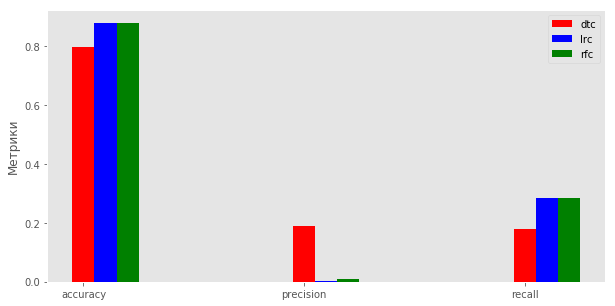

In [973]:
# Визуализировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here
%matplotlib inline
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 5))
ax=fig.add_subplot('111', polar=False)
colors=['r','b','g']
ax.set_ylabel('Метрики')
ax.grid()

for ii, i in enumerate(learn_data.columns):
    ax.bar(0+ii/10, learn_data.loc['accuracy',i], color=colors[ii], width=0.1, label=i)
    ax.bar(1+ii/10, learn_data.loc['precision',i], color=colors[ii], width=0.1)
    ax.bar(2+ii/10, learn_data.loc['recall',i], color=colors[ii], width=0.1)

plt.xticks(range(3), ['accuracy', 'precision', 'recall'])
plt.legend()
plt.show()

dtc roc_auc_score=0.534774056209749
lrc roc_auc_score=0.5011786711936264
rfc roc_auc_score=0.5035360135808788


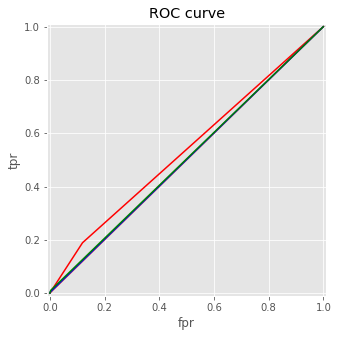

In [974]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой модели

## Your Code Here
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fig = plt.figure(figsize=(5, 5))
#ax=fig.add_subplot('111', polar=False)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

for ii, i in enumerate(learn_data.columns):
    fpr, tpr, thresholds = roc_curve(y_test, learn_data.loc['predict',i])
    plt.plot(fpr, tpr, color=colors[ii])
    print(i, 'roc_auc_score={}'.format(roc_auc_score(y_test, learn_data.loc['predict',i])))

??? Что-то совсем низкие получились! Почему так? Что-то не верно сделал?

In [975]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

# А вот эта штука StratifiedKFold - это для чего???
## Your Code Here

for i in learn_data.columns:
    cvc=cross_val_score(learn_data.loc['model',i], X, y, scoring='roc_auc', cv=10 )
    print('Модель {}. Средний roc_auc={}'.format(i, cvc.mean()))

Модель dtc. Средний roc_auc=0.523814836739269
Модель lrc. Средний roc_auc=0.6447166712401721
Модель rfc. Средний roc_auc=0.5874725453184083


In [976]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки
## Your Code Here

# Готовим таблицу для записи значений
for i in ['predict_proba_for_test','roc_auc_test'] :
    if i not in learn_data.index:
        new_row=pd.DataFrame(data=[],index=[i], columns=learn_set.keys()) 
        learn_data=learn_data.append(new_row)

# Считаем предсказание и метрики для тестовой базы (любопытно, так как лидера среди моделей нет)
for i in learn_data.columns:
    learn_data.loc['predict_proba_for_test',i]=learn_data.loc['model',i].predict_proba(X_test_1)
    learn_data.loc['roc_auc_test',i]=roc_auc_score(y_test_1, learn_data.loc['predict_proba_for_test',i][:,1])

learn_data

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


,dtc,lrc,rfc
model,"DecisionTreeClassifier(class_weight=None, crit...","LogisticRegression(C=1.0, class_weight=None, d...","(DecisionTreeClassifier(class_weight=None, cri..."
predict,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
accuracy,0.796365,0.877819,0.876505
precision,0.189189,0.0036036,0.0108108
recall,0.179487,0.285714,0.285714
predict_proba_for_test,"[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0...","[[0.8342809888697514, 0.16571901113024856], [0...","[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.9, 0.1..."
roc_auc_test,0.52612,0.622565,0.58556


In [977]:
# Померить roc_auc на тесте
print(learn_data.loc['roc_auc_test'])

dtc     0.52612
lrc    0.622565
rfc     0.58556
Name: roc_auc_test, dtype: object
